#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

**2η Εργαστηριακή Άσκηση**

 Δημήτρης Καλαθάς 03118016

Δημήτρης Μπακάλης 03118163

**Ομάδα 7**

### **Θεωρητικό Μέρος:**

**Περιγράψτε τη λειτουργία της Rectified Linear Unit (ReLU).**

Η ReLU έιναι μία συνάρτηση ενεργοποίησης, η οποία μηδενίζει τις αρνητικές εισόδους και μεταφέρει τις θετικές στην έξοδο αυτούσιες. Περιγράφεται με τον παρακάτω μαθηματικό τύπο:

ReLU(x) = max{0, x}

Χρησιμοποείται κατά κόρον στο deep learning (και ειδικά στα CNNs), καθώς εισάγει τη μη γραμμικότητα στα δεδομένα μας, καθιστώντας τα πιο ρεαλιστικά. Παράλληλα, συνήθως προτιμάται από άλλες συναρτήσεις ενεργοποίησης, όπως η σιγμοειδής ή η υπερβολική, λόγω της σημαντικά μικρότερης υπολογιστικής της πολυπλοκότητας.

**Παρουσιάστε ένα συγκριτικό πίνακα με τα επίπεδα, το μέγεθος των φίλτρων συνάρτηση ενεργοποίησης, πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα και σχολιάστε επαρκώς τις διαφορές τους. Ποια χαρακτηριστικά αυτών των τριών δικτύων είναι κατά τη γνώμη σας αυτά που συνέβαλαν στη σταδιακή αύξηση της ακρίβειας ταξινόμησης.**

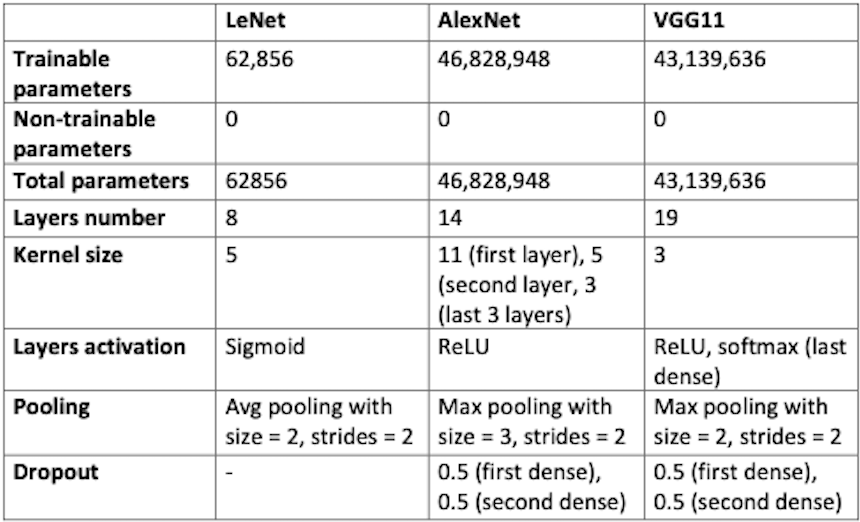

Αρχικά, παρατηρείται η βελτιστοποίηση του accuracy, όσο αυξάνεται ο αριθμός των trainable παραμέτρων και των layers, γεγονός που είναι διαισθητικά προφανές. Επιπλέον, στα μοντέλα Alexnet και VGG, καταφέρνουμε να περιορίσουμε αρκετά το overfitting, τόσο μέσω του pooling (αγνοούνται μερικές λεπτομέρειες των εικόνων), όσο και μέσω του dropout, το οποίο και στις δύο περιπτώσεις έχει τιμή 0.5. Τέλος, η αλλαγή της συνάρτησης ενεργοποίησης σε ReLU, είχε καταλυτικό ρόλο στην αποτελεσματικότερη εκπαίδευση του μοντέλου, καθώς συντέλεσε στην αντιμετώπιση του overfitting, την είσαγωγη της μη γραμμικότητας στα δεδομένα κλπ.

### **Πρακτικό Μέρος**

### Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [3]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 4s 0us/step


In [4]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [5]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 7

In [6]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [7]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [8]:
# print our classes
print(our_index)
print(our_classes)
print(len(our_classes))

[0, 8, 15, 20, 24, 26, 38, 40, 41, 61, 63, 66, 70, 75, 81, 82, 88, 91, 93, 98]
['apple', ' bicycle', ' camel', ' chair', ' cockroach', ' crab', ' kangaroo', ' lamp', ' lawn_mower', ' plate', ' porcupine', ' raccoon', ' rose', ' skunk', ' streetcar', ' sunflower', ' tiger', ' trout', ' turtle', ' woman']
20


In [9]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


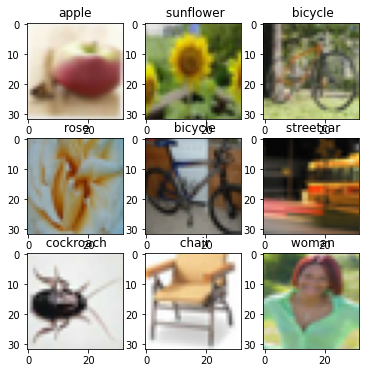

In [10]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [11]:
dictionary = {
    0:0,
    8:1,
    15:2,
    20:3,
    24:4,
    26:5,
    38:6,
    40:7,
    41:8,
    61:9,
    63:10,
    66:11,
    70:12,
    75:13, 
    81:14, 
    82:15, 
    88:16, 
    91:17, 
    93:18, 
    98:19
}

for i in range(len(y_train)):
  y_train[i][0] = dictionary[y_train[i][0]]

for i in range(len(y_val)):
  y_val[i][0] = dictionary[y_val[i][0]]

for i in range(len(y_test)):
  y_test[i][0] = dictionary[y_test[i][0]]

In [12]:
x_train_lenet = tf.image.resize(x_train, (28, 28))
x_val_lenet = tf.image.resize(x_val, (28, 28))
x_test_lenet = tf.image.resize(x_test, (28, 28))

In [13]:
x_train_alexnet_vgg = tf.image.resize(x_train, (224, 224))
x_val_alexnet_vgg = tf.image.resize(x_val, (224, 224))
x_test_alexnet_vgg = tf.image.resize(x_test, (224, 224))

## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα (όπως στο Lab8.1).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.


### LeNet:

In [14]:
def LeNet():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                               padding='same', input_shape=(28, 28, 3)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dense(20)])

In [15]:
lenet1 = LeNet()
lenet1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [16]:
lenet1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_lenet1 = lenet1.fit(x_train_lenet, y_train, 
                    epochs=10, batch_size=256,
                    validation_data=(x_val_lenet, y_val))


Epoch 1/10
34/34 [==============================] - 11s 15ms/step - loss: 3.0342 - accuracy: 0.0506 - val_loss: 3.0001 - val_accuracy: 0.0627
Epoch 2/10
34/34 [==============================] - 0s 7ms/step - loss: 3.0006 - accuracy: 0.0440 - val_loss: 3.0051 - val_accuracy: 0.0460
Epoch 3/10
34/34 [==============================] - 0s 6ms/step - loss: 2.9987 - accuracy: 0.0460 - val_loss: 2.9998 - val_accuracy: 0.0493
Epoch 4/10
34/34 [==============================] - 0s 6ms/step - loss: 2.9889 - accuracy: 0.0541 - val_loss: 2.9704 - val_accuracy: 0.0847
Epoch 5/10
34/34 [==============================] - 0s 6ms/step - loss: 2.9354 - accuracy: 0.0813 - val_loss: 2.8879 - val_accuracy: 0.0773
Epoch 6/10
34/34 [==============================] - 0s 6ms/step - loss: 2.8613 - accuracy: 0.1014 - val_loss: 2.8303 - val_accuracy: 0.1460
Epoch 7/10
34/34 [==============================] - 0s 6ms/step - loss: 2.8230 - accuracy: 0.1227 - val_loss: 2.8091 - val_accuracy: 0.1573
Epoch 8/10
34/34 [

In [17]:
lenet2 = LeNet()
lenet2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [18]:
lenet2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_lenet2 = lenet2.fit(x_train_lenet, y_train, 
                    epochs=10, batch_size=64,
                    validation_data=(x_val_lenet, y_val))

Epoch 1/10
133/133 [==============================] - 1s 6ms/step - loss: 3.0063 - accuracy: 0.0489 - val_loss: 2.9977 - val_accuracy: 0.0427
Epoch 2/10
133/133 [==============================] - 1s 4ms/step - loss: 2.9977 - accuracy: 0.0531 - val_loss: 2.9969 - val_accuracy: 0.0480
Epoch 3/10
133/133 [==============================] - 1s 4ms/step - loss: 2.9826 - accuracy: 0.0699 - val_loss: 2.9594 - val_accuracy: 0.0920
Epoch 4/10
133/133 [==============================] - 1s 4ms/step - loss: 2.9169 - accuracy: 0.0901 - val_loss: 2.8871 - val_accuracy: 0.0980
Epoch 5/10
133/133 [==============================] - 1s 4ms/step - loss: 2.8589 - accuracy: 0.0968 - val_loss: 2.8501 - val_accuracy: 0.1013
Epoch 6/10
133/133 [==============================] - 1s 4ms/step - loss: 2.8284 - accuracy: 0.1192 - val_loss: 2.8231 - val_accuracy: 0.1260
Epoch 7/10
133/133 [==============================] - 1s 4ms/step - loss: 2.8014 - accuracy: 0.1374 - val_loss: 2.7900 - val_accuracy: 0.1493
Epoch 

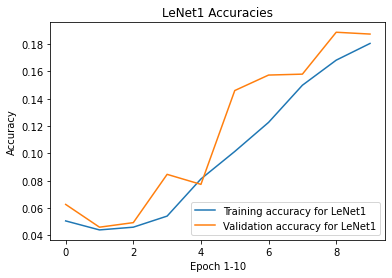

In [19]:
plt.title("LeNet1 Accuracies")
plt.plot(history_lenet1.history['accuracy'], label='Training accuracy for LeNet1')
plt.plot(history_lenet1.history['val_accuracy'], label='Validation accuracy for LeNet1')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


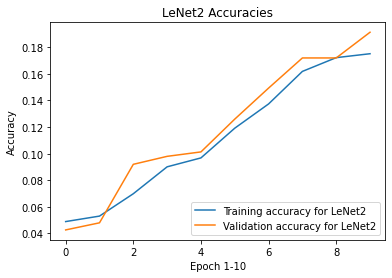

In [20]:
plt.title("LeNet2 Accuracies")
plt.plot(history_lenet2.history['accuracy'], label='Training accuracy for LeNet2')
plt.plot(history_lenet2.history['val_accuracy'], label='Validation accuracy for LeNet2')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### AlexNet

In [21]:
def AlexNet():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4,
                               activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),

        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),

        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),

        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),

        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)
    ])


In [22]:
alexnet1 = AlexNet()
alexnet1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 384)      

In [23]:
alexnet1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_alexnet1 = alexnet1.fit(x_train_alexnet_vgg, y_train, 
                    epochs=10, batch_size=128,
                    validation_data=(x_val_alexnet_vgg, y_val))

Epoch 1/10
67/67 [==============================] - 14s 166ms/step - loss: 3.0260 - accuracy: 0.0592 - val_loss: 2.9622 - val_accuracy: 0.0987
Epoch 2/10
67/67 [==============================] - 9s 134ms/step - loss: 2.7919 - accuracy: 0.1262 - val_loss: 2.6020 - val_accuracy: 0.1913
Epoch 3/10
67/67 [==============================] - 9s 135ms/step - loss: 2.5170 - accuracy: 0.2246 - val_loss: 2.3429 - val_accuracy: 0.2807
Epoch 4/10
67/67 [==============================] - 9s 135ms/step - loss: 2.2822 - accuracy: 0.3052 - val_loss: 2.1960 - val_accuracy: 0.3280
Epoch 5/10
67/67 [==============================] - 9s 136ms/step - loss: 2.0917 - accuracy: 0.3601 - val_loss: 2.0530 - val_accuracy: 0.3913
Epoch 6/10
67/67 [==============================] - 9s 136ms/step - loss: 1.9306 - accuracy: 0.4174 - val_loss: 2.0139 - val_accuracy: 0.4200
Epoch 7/10
67/67 [==============================] - 9s 137ms/step - loss: 1.8563 - accuracy: 0.4421 - val_loss: 1.9054 - val_accuracy: 0.4427
Epoch

In [24]:
alexnet2 = AlexNet()
alexnet2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 384)       885120    
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 384)      

In [25]:
alexnet2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_alexnet2 = alexnet2.fit(x_train_alexnet_vgg, y_train, 
                    epochs=10, batch_size=32,
                    validation_data=(x_val_alexnet_vgg, y_val))

Epoch 1/10
266/266 [==============================] - 14s 50ms/step - loss: 2.9298 - accuracy: 0.0896 - val_loss: 2.6634 - val_accuracy: 0.2060
Epoch 2/10
266/266 [==============================] - 12s 46ms/step - loss: 2.4486 - accuracy: 0.2440 - val_loss: 2.2320 - val_accuracy: 0.3280
Epoch 3/10
266/266 [==============================] - 12s 46ms/step - loss: 2.0832 - accuracy: 0.3654 - val_loss: 1.9468 - val_accuracy: 0.4120
Epoch 4/10
266/266 [==============================] - 12s 46ms/step - loss: 1.8214 - accuracy: 0.4521 - val_loss: 1.8252 - val_accuracy: 0.4507
Epoch 5/10
266/266 [==============================] - 12s 46ms/step - loss: 1.6254 - accuracy: 0.5007 - val_loss: 1.7267 - val_accuracy: 0.4740
Epoch 6/10
266/266 [==============================] - 13s 47ms/step - loss: 1.4182 - accuracy: 0.5686 - val_loss: 1.5229 - val_accuracy: 0.5633
Epoch 7/10
266/266 [==============================] - 12s 47ms/step - loss: 1.2295 - accuracy: 0.6189 - val_loss: 1.3824 - val_accuracy:

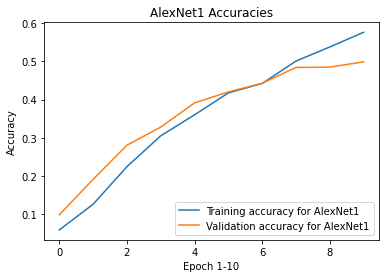

In [26]:
plt.title("AlexNet1 Accuracies")
plt.plot(history_alexnet1.history['accuracy'], label='Training accuracy for AlexNet1')
plt.plot(history_alexnet1.history['val_accuracy'], label='Validation accuracy for AlexNet1')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


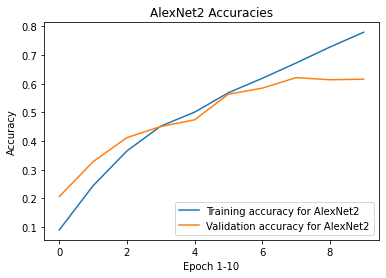

In [27]:
plt.title("AlexNet2 Accuracies")
plt.plot(history_alexnet2.history['accuracy'], label='Training accuracy for AlexNet2')
plt.plot(history_alexnet2.history['val_accuracy'], label='Validation accuracy for AlexNet2')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### VGG:

In [28]:
def vgg_block(num_convs, num_channels):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(tf.keras.layers.Conv2D(num_channels,kernel_size=3,
                                    padding='same',activation='relu'))
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk

def VGG(conv_arch):
    net = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding = 'same',
                               activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPool2D(pool_size=2, strides=2)
    ])
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))

    net.add(tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20, activation = 'softmax')]))
    return net

In [29]:
conv_arch = ((1, 128), (2, 256), (2, 512), (2, 512))

ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
vgg1 = VGG(small_conv_arch)
vgg1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 sequential_5 (Sequential)   (None, 56, 56, 32)        9248      
                                                                 
 sequential_6 (Sequential)   (None, 28, 28, 64)        55424     
                                                                 
 sequential_7 (Sequential)   (None, 14, 14, 128)       221440    
                                                                 
 sequential_8 (Sequential)   (None, 7, 7, 128)         295168    
                                                      

In [30]:
vgg1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_vgg1 = vgg1.fit(x_train_alexnet_vgg, y_train, 
                    epochs=10, batch_size=128,
                    validation_data=(x_val_alexnet_vgg, y_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


67/67 [==============================] - 21s 271ms/step - loss: 2.9589 - accuracy: 0.0653 - val_loss: 2.8748 - val_accuracy: 0.0973
Epoch 2/10
67/67 [==============================] - 16s 238ms/step - loss: 2.6748 - accuracy: 0.1452 - val_loss: 2.5567 - val_accuracy: 0.1867
Epoch 3/10
67/67 [==============================] - 16s 238ms/step - loss: 2.4093 - accuracy: 0.2428 - val_loss: 2.3275 - val_accuracy: 0.2880
Epoch 4/10
67/67 [==============================] - 16s 238ms/step - loss: 2.1494 - accuracy: 0.3341 - val_loss: 2.0773 - val_accuracy: 0.3727
Epoch 5/10
67/67 [==============================] - 16s 238ms/step - loss: 1.8884 - accuracy: 0.4209 - val_loss: 1.9024 - val_accuracy: 0.4240
Epoch 6/10
67/67 [==============================] - 16s 238ms/step - loss: 1.6613 - accuracy: 0.4915 - val_loss: 1.7732 - val_accuracy: 0.4613
Epoch 7/10
67/67 [==============================] - 16s 238ms/step - loss: 1.4586 - accuracy: 0.5495 - val_loss: 1.6949 - val_accuracy: 0.4900
Epoch 8/10

In [31]:
vgg2 = VGG(small_conv_arch)
vgg2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 sequential_11 (Sequential)  (None, 56, 56, 32)        9248      
                                                                 
 sequential_12 (Sequential)  (None, 28, 28, 64)        55424     
                                                                 
 sequential_13 (Sequential)  (None, 14, 14, 128)       221440    
                                                                 
 sequential_14 (Sequential)  (None, 7, 7, 128)         295168    
                                                     

In [32]:
vgg2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_vgg2 = vgg2.fit(x_train_alexnet_vgg, y_train, 
                    epochs=10, batch_size=32,
                    validation_data=(x_val_alexnet_vgg, y_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


266/266 [==============================] - 21s 73ms/step - loss: 2.8174 - accuracy: 0.1100 - val_loss: 2.4964 - val_accuracy: 0.2140
Epoch 2/10
266/266 [==============================] - 18s 69ms/step - loss: 2.3335 - accuracy: 0.2720 - val_loss: 2.1374 - val_accuracy: 0.3327
Epoch 3/10
266/266 [==============================] - 18s 69ms/step - loss: 1.9455 - accuracy: 0.4114 - val_loss: 1.8214 - val_accuracy: 0.4707
Epoch 4/10
266/266 [==============================] - 18s 69ms/step - loss: 1.6310 - accuracy: 0.5059 - val_loss: 1.6820 - val_accuracy: 0.5053
Epoch 5/10
266/266 [==============================] - 18s 69ms/step - loss: 1.3700 - accuracy: 0.5804 - val_loss: 1.5794 - val_accuracy: 0.5367
Epoch 6/10
266/266 [==============================] - 18s 69ms/step - loss: 1.1215 - accuracy: 0.6593 - val_loss: 1.4536 - val_accuracy: 0.5813
Epoch 7/10
266/266 [==============================] - 18s 69ms/step - loss: 0.8460 - accuracy: 0.7361 - val_loss: 1.4461 - val_accuracy: 0.6067
Epo

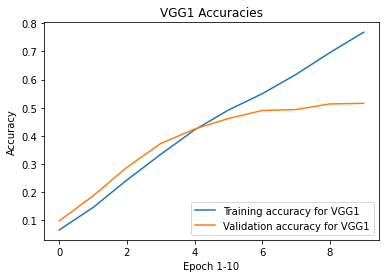

In [33]:
plt.title("VGG1 Accuracies")
plt.plot(history_vgg1.history['accuracy'], label='Training accuracy for VGG1')
plt.plot(history_vgg1.history['val_accuracy'], label='Validation accuracy for VGG1')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

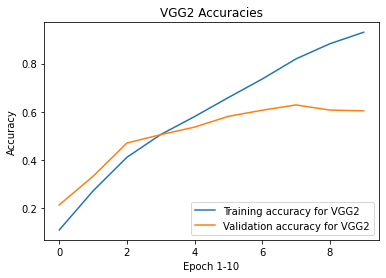

In [34]:
plt.title("VGG2 Accuracies")
plt.plot(history_vgg2.history['accuracy'], label='Training accuracy for VGG2')
plt.plot(history_vgg2.history['val_accuracy'], label='Validation accuracy for VGG2')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### MyCNN:

In [35]:
def MyCNN():
  return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                               activation='relu', input_shape = (32, 32, 3)),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(20)
    ])


In [36]:
mycnn1 = MyCNN()
mycnn1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 3, 3, 128)      

In [37]:
mycnn1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_mycnn1 = mycnn1.fit(x_train, y_train, 
                    epochs=10, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
67/67 [==============================] - 2s 14ms/step - loss: 2.8523 - accuracy: 0.1165 - val_loss: 2.6453 - val_accuracy: 0.1587
Epoch 2/10
67/67 [==============================] - 1s 8ms/step - loss: 2.3509 - accuracy: 0.2806 - val_loss: 2.3173 - val_accuracy: 0.3080
Epoch 3/10
67/67 [==============================] - 1s 8ms/step - loss: 2.0347 - accuracy: 0.3795 - val_loss: 1.9876 - val_accuracy: 0.3933
Epoch 4/10
67/67 [==============================] - 1s 8ms/step - loss: 1.8035 - accuracy: 0.4515 - val_loss: 2.0163 - val_accuracy: 0.3873
Epoch 5/10
67/67 [==============================] - 1s 8ms/step - loss: 1.6773 - accuracy: 0.4958 - val_loss: 1.8155 - val_accuracy: 0.4700
Epoch 6/10
67/67 [==============================] - 1s 8ms/step - loss: 1.5587 - accuracy: 0.5273 - val_loss: 1.6855 - val_accuracy: 0.5040
Epoch 7/10
67/67 [==============================] - 1s 8ms/step - loss: 1.4614 - accuracy: 0.5601 - val_loss: 1.5886 - val_accuracy: 0.5327
Epoch 8/10
67/67 [=

In [38]:
mycnn2 = MyCNN()
mycnn2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 3, 3, 128)      

In [39]:
mycnn2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_mycnn2 = mycnn2.fit(x_train, y_train, 
                    epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
266/266 [==============================] - 2s 6ms/step - loss: 2.7933 - accuracy: 0.1433 - val_loss: 2.5378 - val_accuracy: 0.2307
Epoch 2/10
266/266 [==============================] - 1s 5ms/step - loss: 2.3764 - accuracy: 0.2744 - val_loss: 2.2477 - val_accuracy: 0.3233
Epoch 3/10
266/266 [==============================] - 1s 5ms/step - loss: 2.1544 - accuracy: 0.3446 - val_loss: 2.0915 - val_accuracy: 0.3773
Epoch 4/10
266/266 [==============================] - 1s 5ms/step - loss: 1.9749 - accuracy: 0.4021 - val_loss: 2.0678 - val_accuracy: 0.3800
Epoch 5/10
266/266 [==============================] - 1s 5ms/step - loss: 1.8374 - accuracy: 0.4426 - val_loss: 1.9175 - val_accuracy: 0.4327
Epoch 6/10
266/266 [==============================] - 1s 5ms/step - loss: 1.7408 - accuracy: 0.4764 - val_loss: 1.8854 - val_accuracy: 0.4327
Epoch 7/10
266/266 [==============================] - 1s 5ms/step - loss: 1.6591 - accuracy: 0.5018 - val_loss: 1.8444 - val_accuracy: 0.4560
Epoch 

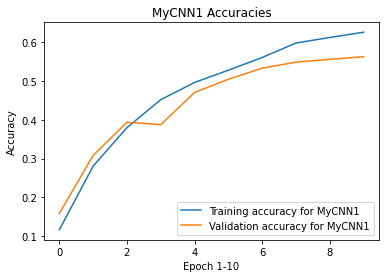

In [40]:
plt.title("MyCNN1 Accuracies")
plt.plot(history_mycnn1.history['accuracy'], label='Training accuracy for MyCNN1')
plt.plot(history_mycnn1.history['val_accuracy'], label='Validation accuracy for MyCNN1')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


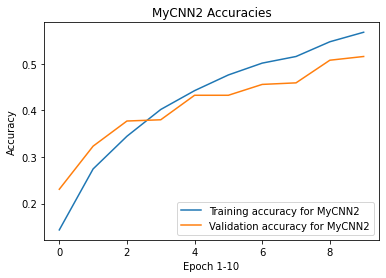

In [41]:
plt.title("MyCNN2 Accuracies")
plt.plot(history_mycnn2.history['accuracy'], label='Training accuracy for MyCNN2')
plt.plot(history_mycnn2.history['val_accuracy'], label='Validation accuracy for MyCNN2')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### Model Comparison:

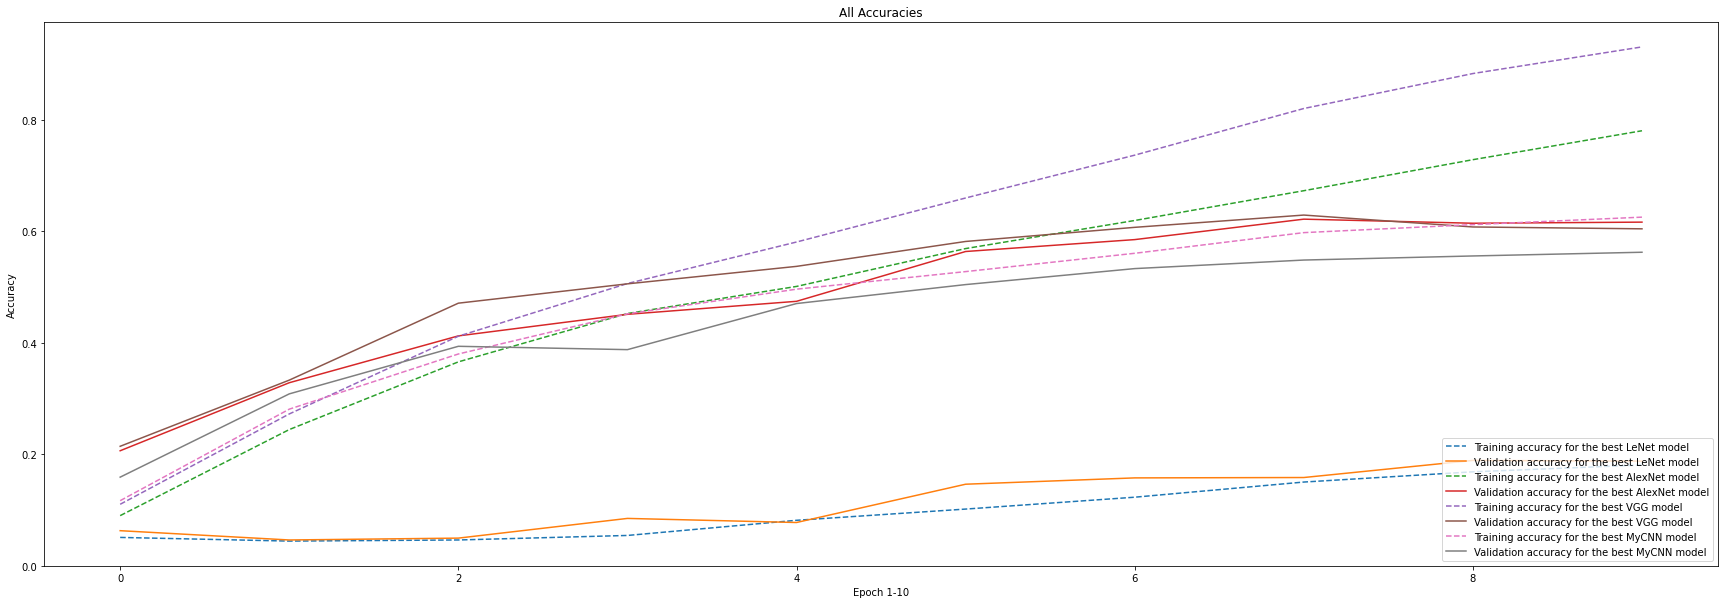

In [42]:
plt.figure(figsize = (30, 10))
plt.title("All Accuracies")
plt.plot(history_lenet1.history['accuracy'], '--', label='Training accuracy for the best LeNet model')
plt.plot(history_lenet1.history['val_accuracy'], label='Validation accuracy for the best LeNet model')
plt.plot(history_alexnet2.history['accuracy'], '--', label='Training accuracy for the best AlexNet model')
plt.plot(history_alexnet2.history['val_accuracy'], label='Validation accuracy for the best AlexNet model')
plt.plot(history_vgg2.history['accuracy'], '--', label='Training accuracy for the best VGG model')
plt.plot(history_vgg2.history['val_accuracy'], label='Validation accuracy for the best VGG model')
plt.plot(history_mycnn1.history['accuracy'], '--', label='Training accuracy for the best MyCNN model')
plt.plot(history_mycnn1.history['val_accuracy'], label='Validation accuracy for the best MyCNN model')
plt.xlabel('Epoch 1-10')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### Model Evaluation:

In [43]:
print("Optimal LeNet:")
test_loss_lenet, test_acc_lenet = lenet1.evaluate(x_test_lenet, y_test, verbose=2)
print()
print("Optimal AlexNet:")
test_loss_alexnet, test_acc_alexnet = alexnet2.evaluate(x_test_alexnet_vgg, y_test, verbose=2)
print()
print("Optimal VGG:")
test_loss_vgg, test_acc_vgg = vgg2.evaluate(x_test_alexnet_vgg, y_test, verbose=2)
print()
print("Optimal MyCNN:")
test_loss_mycnn, test_acc_mycnn = mycnn1.evaluate(x_test, y_test, verbose=2)

Optimal LeNet:
63/63 - 0s - loss: 2.6738 - accuracy: 0.1930 - 176ms/epoch - 3ms/step

Optimal AlexNet:
63/63 - 1s - loss: 1.4978 - accuracy: 0.6100 - 1s/epoch - 22ms/step

Optimal VGG:
63/63 - 2s - loss: 1.9777 - accuracy: 0.6115 - 2s/epoch - 27ms/step

Optimal MyCNN:
63/63 - 0s - loss: 1.4936 - accuracy: 0.5580 - 209ms/epoch - 3ms/step


**Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:**

Πλήθος Δεδομένων - Κλάσεων:

Σχετικά με το πλήθος των δεδομένων εύκολα παρατηρεί κανείς ότι, όσο πιο πολλά δεδομένα έχουμε στη διάθεσή μας, τόσο μεγαλύτερη ακρίβεια εξασφαλίζουμε. Στην περίπτωση που είχαμε λίγα δεδομένα, το νευρωνικό πετύχαινε αρκετά μεγάλο train_accuracy, αλλά δεν μπορούσε να γενικεύσει( γεγονός που αποτυπώθηκε στο χαμηλό val_acc).

Σχετικά με το πλήθος των κλάσεων, διαπιστώσαμε ότι όσο μεγαλώναμε τον αριθμό των κλάσεων η ακρίβεια μειωνόταν κατά κάποιο τρόπο. Αρχικά, αντί να κάνουμε αντίστοιχιση των κλάσεων μέσω ενός dictionary, ορίσαμε την τελευταία dense ως dense(100). Αυτό είχε ως αποτέλεσμα να καθυστερεί σημαντικά περισσότερο η εκπαίδευση του νευρωνικού μας, μέχρι να <<καταλάβει>> ότι οι 80 κλάσεις περισσεύουν.

Optimizers :

Όσον αφορά τους optimizers, επιλέξαμε να μελέτήσουμε τους Adam, Adamax. Οπως παρατηρεί κανείς απο την πρώτη στήλη των subplots, ο Adam πετυχαίνει σχεδόν το ίδιο val_accuracy με τον Adamax. H μόνη διαφορά που μπορούμε να παρατηρήσουμε είναι ότι στον Adamax η γραφική δεν παρουσιάζει απότομες αλλαγές και είναι πιο smooth. Aπο την άλλη, διαπιστώνουμε ότι ο Adam πετυχαίνει καλύτερο train accuracy(για μικρό Batch size) και το ίδιο val_accuraccy με τον Adamax.

Επίδραση Batch Size:

Όσο μικρότερο είναι το batch size, τόσο μικρότερες είναι οι απαιτήσεις σε μνήμη. Παράλληλα, το δίκτυο εκπαίδευεται πιο αποτελεσματικά δίνοντας καλύτερο accuracy. Ωστόσο, με μικρά batch_sizes, αυξάνεται ο χρόνος εκπαίδευσης του δικτύου. Για τους παραπάνω λόγους, συνήθως, επιλέγουμε batch size από 32 εώς 128. 



## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 
- Πρόωρος τερματισμός (early stopping [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)) 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

### MyCNN Evaluation:

In [44]:
def MyCNN1():
  data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
  return tf.keras.models.Sequential([
        data_augmentation,                            
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(20)
    ])

In [45]:
def MyCNN2():
  return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(20)
  ])

In [46]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

mycnn1 = MyCNN1()

mycnn1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_mycnn1 = mycnn1.fit(x_train, y_train, 
                    epochs=50, batch_size=128, callbacks = [callback],
                    validation_data=(x_val, y_val))

Epoch 1/50
67/67 [==============================] - 2s 13ms/step - loss: 2.8871 - accuracy: 0.0966 - val_loss: 2.7235 - val_accuracy: 0.1567
Epoch 2/50
67/67 [==============================] - 1s 10ms/step - loss: 2.6203 - accuracy: 0.1854 - val_loss: 2.4186 - val_accuracy: 0.2733
Epoch 3/50
67/67 [==============================] - 1s 10ms/step - loss: 2.3982 - accuracy: 0.2614 - val_loss: 2.2923 - val_accuracy: 0.2887
Epoch 4/50
67/67 [==============================] - 1s 10ms/step - loss: 2.2500 - accuracy: 0.3107 - val_loss: 2.0824 - val_accuracy: 0.3833
Epoch 5/50
67/67 [==============================] - 1s 10ms/step - loss: 2.1104 - accuracy: 0.3534 - val_loss: 2.0200 - val_accuracy: 0.3873
Epoch 6/50
67/67 [==============================] - 1s 10ms/step - loss: 2.0156 - accuracy: 0.3768 - val_loss: 1.9225 - val_accuracy: 0.4340
Epoch 7/50
67/67 [==============================] - 1s 10ms/step - loss: 1.9634 - accuracy: 0.3973 - val_loss: 1.8307 - val_accuracy: 0.4533
Epoch 8/50
67

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(x_train)

mycnn2 = MyCNN2()

mycnn2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_mycnn2 = mycnn2.fit(x_train, y_train, 
                    epochs=50, batch_size=128, callbacks = [callback],
                    validation_data=(x_val, y_val))

Epoch 1/50
67/67 [==============================] - 1s 12ms/step - loss: 2.9266 - accuracy: 0.0776 - val_loss: 2.7431 - val_accuracy: 0.1353
Epoch 2/50
67/67 [==============================] - 1s 8ms/step - loss: 2.6935 - accuracy: 0.1595 - val_loss: 2.4959 - val_accuracy: 0.2333
Epoch 3/50
67/67 [==============================] - 1s 8ms/step - loss: 2.4754 - accuracy: 0.2295 - val_loss: 2.3033 - val_accuracy: 0.3013
Epoch 4/50
67/67 [==============================] - 1s 8ms/step - loss: 2.2848 - accuracy: 0.2961 - val_loss: 2.1564 - val_accuracy: 0.3513
Epoch 5/50
67/67 [==============================] - 1s 8ms/step - loss: 2.1550 - accuracy: 0.3301 - val_loss: 2.0039 - val_accuracy: 0.4127
Epoch 6/50
67/67 [==============================] - 1s 8ms/step - loss: 2.0366 - accuracy: 0.3821 - val_loss: 1.9979 - val_accuracy: 0.4147
Epoch 7/50
67/67 [==============================] - 1s 8ms/step - loss: 1.9508 - accuracy: 0.4014 - val_loss: 1.8794 - val_accuracy: 0.4473
Epoch 8/50
67/67 [=

In [48]:
test_loss_mycnn1, test_acc_mycnn1 = mycnn1.evaluate(x_test, y_test, verbose=2)

63/63 - 0s - loss: 1.3155 - accuracy: 0.6360 - 188ms/epoch - 3ms/step


In [49]:
test_loss_mycnn2, test_acc_mycnn2 = mycnn2.evaluate(x_test, y_test, verbose=2)

63/63 - 0s - loss: 1.4551 - accuracy: 0.6230 - 170ms/epoch - 3ms/step


**Σχολιασμός:**

Παρατηρήσαμε ότι με τη χρήση της τεχνικής Early Stopping, όταν αυξάναμε τον αριθμό των εποχών, η διαδικασία της εκπαίδευσης τερμάτιζε. Κάτι τέτοιο ήταν επιθυμητό, αφού το val_acc απέκλινε απο του train_acc και το val_loss αυξανότανε, άρα παρουσιάστηκε το φαινόμενο του overfiting. Αναφορικά με το Dropout, παρατηρήσαμε ότι πετύχαμε καλύτερο accuracy με την χρήση τους, αλλα δεν θα πρεπει να αυξήσουμε πάρα πολύ τον συντελεστή γιατί ετσι χαλάει κατα πολύ το val_accuracy, αγνοώντας σημαντική ποσότητα κόμβων του δικτύου. Τέλος, αναφορικά με το Data Augmentation, αυξήσαμε, στην ουσία (με δύο τρόπους), τα train δεδόμενα, διαφοροποιώντας το scale και το rotation των εικόνων, με αποτέλεσμα να αυξηθεί η ακριβεία του μοντέλου μας, όπως ειπώθηκε και παραπάνω.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

### Transfer Learning:

In [54]:
vgg16 = tf.keras.applications.vgg16.VGG16(input_shape=(32,32,3), include_top=False)
vgg16.trainable=False
vgg16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [55]:
cnn1 = tf.keras.Sequential([
        vgg16,
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.15),
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.15),
        layers.Dense(20)
])
                             
cnn.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                32832     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 20)              

In [56]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

cnn1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_vgg16_1 = cnn1.fit(x_train, y_train, 
                    epochs=50, batch_size=128, callbacks = [callback],
                    validation_data=(x_val, y_val))

Epoch 1/50
67/67 [==============================] - 3s 29ms/step - loss: 2.7038 - accuracy: 0.1882 - val_loss: 2.2164 - val_accuracy: 0.4027
Epoch 2/50
67/67 [==============================] - 2s 24ms/step - loss: 2.1324 - accuracy: 0.3560 - val_loss: 1.8597 - val_accuracy: 0.4647
Epoch 3/50
67/67 [==============================] - 2s 24ms/step - loss: 1.8885 - accuracy: 0.4259 - val_loss: 1.7092 - val_accuracy: 0.5033
Epoch 4/50
67/67 [==============================] - 2s 24ms/step - loss: 1.7567 - accuracy: 0.4660 - val_loss: 1.6271 - val_accuracy: 0.5313
Epoch 5/50
67/67 [==============================] - 2s 24ms/step - loss: 1.6677 - accuracy: 0.4918 - val_loss: 1.5575 - val_accuracy: 0.5400
Epoch 6/50
67/67 [==============================] - 2s 24ms/step - loss: 1.5787 - accuracy: 0.5224 - val_loss: 1.5004 - val_accuracy: 0.5573
Epoch 7/50
67/67 [==============================] - 2s 24ms/step - loss: 1.5274 - accuracy: 0.5341 - val_loss: 1.4819 - val_accuracy: 0.5600
Epoch 8/50
67

In [57]:
vgg16 = tf.keras.applications.vgg16.VGG16(input_shape=(32,32,3), include_top=False)
for i, layer in enumerate(vgg16.layers):
  if i < 15:
    layer.trainable = False
  else:
    layer.trainable = True 

In [58]:
cnn2 = tf.keras.Sequential([
        vgg16,
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.15),
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.15),
        layers.Dense(20)
])
                             
cnn2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                32832     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 20)              

In [59]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

cnn2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_vgg16_2 = cnn2.fit(x_train, y_train, 
                    epochs=50, batch_size=128, callbacks = [callback],
                    validation_data=(x_val, y_val))

Epoch 1/50
67/67 [==============================] - 3s 35ms/step - loss: 2.4516 - accuracy: 0.2487 - val_loss: 1.8658 - val_accuracy: 0.4453
Epoch 2/50
67/67 [==============================] - 2s 32ms/step - loss: 1.6786 - accuracy: 0.5047 - val_loss: 1.4066 - val_accuracy: 0.5827
Epoch 3/50
67/67 [==============================] - 2s 32ms/step - loss: 1.2801 - accuracy: 0.6276 - val_loss: 1.3944 - val_accuracy: 0.6093
Epoch 4/50
67/67 [==============================] - 2s 32ms/step - loss: 1.0590 - accuracy: 0.6989 - val_loss: 1.3072 - val_accuracy: 0.6500
Epoch 5/50
67/67 [==============================] - 2s 33ms/step - loss: 0.8677 - accuracy: 0.7539 - val_loss: 1.2387 - val_accuracy: 0.6673
Epoch 6/50
67/67 [==============================] - 2s 32ms/step - loss: 0.7439 - accuracy: 0.7925 - val_loss: 1.3042 - val_accuracy: 0.6553
Epoch 7/50
67/67 [==============================] - 2s 32ms/step - loss: 0.6446 - accuracy: 0.8149 - val_loss: 1.3682 - val_accuracy: 0.6667
Epoch 8/50
67

In [60]:
test_loss_cnn1, test_acc_cnn1 = cnn1.evaluate(x_test, y_test, verbose=2)
test_loss_cnn2, test_acc_cnn2 = cnn2.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.3844 - accuracy: 0.5990 - 1s/epoch - 20ms/step
63/63 - 1s - loss: 1.7698 - accuracy: 0.6920 - 558ms/epoch - 9ms/step


**Σχολιασμός:**

Με χρήση του transfer learning παρατηρούμε σημαντικές αλλαγές, τόσο στην ταχύτητα, όσο και στο accuracy του δικτύου μας. Αυτό συμβαίνει, λόγω των περιορισμένων trainable παραμέτρων, επειδή οι περισσότερες είναι ήδη fine tuned. Επομένως, το βέλτιστο loss επιτυγχάνεται μόλις στην 4η εποχή, δίνοντας τελικό accuracy 65% (~5-10% παραπάνω από τις άλλες περιπτώσεις).

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
